#### After running main `<size>_<name>_<transform>_<channel>.ipynb` notebook, use this to regenerate plots as needed.

In [5]:
DATA_NAME = 'batch0approx1e5-agriVision-fourier-blue' # size-name-transform-channel
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'group')
master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df.csv"), index_col=GROUP)
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))
GROUPS = sorted(master_df.index)

In [6]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [7]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
band,,,,,,,,,,,,,,,,,,,,,
2,3.389382e+08,1.963741e+08,552712450.0,421.84155,123.974430,696.23804,45000.0,0.16,1.0,0.011932,...,5670.9700,0.048010,1.404120e-90,5012.7400,0.021871,3.941170e-19,3967.8500,0.019029,1.382990e-14,1.040585e-02
5,1.737109e+08,1.001625e+08,327317660.0,628.03000,108.212240,1663.23950,117000.0,0.17,1.3,0.012360,...,3910.2000,0.044770,3.208880e-204,3477.2400,0.019793,3.013310e-40,2746.9400,0.014947,3.910420e-23,4.417691e-09
8,6.727504e+07,3.507278e+07,170615260.0,1363.73070,99.365600,3639.23580,189000.0,0.17,1.0,0.011212,...,2587.0300,0.040666,5.163950e-272,2299.6500,0.015668,9.839350e-41,1820.7600,0.012822,2.031100e-27,1.284655e-05
11,3.197149e+07,1.499865e+07,102286740.0,2698.31760,93.680930,4889.27800,495000.0,0.18,1.2,0.005074,...,1862.9500,0.037671,0.000000e+00,1650.6300,0.012539,4.945440e-68,1319.4800,0.009905,1.306900e-42,5.197276e-08
14,1.270560e+07,6.076386e+06,39761884.0,2654.29520,86.305040,4711.62940,1134000.0,0.19,1.4,0.004087,...,1290.7700,0.036370,0.000000e+00,1139.2500,0.010589,7.199270e-111,919.2000,0.009186,1.516550e-83,7.405179e-12
17,7.576061e+06,2.721038e+06,43174530.0,12164.64200,72.317085,7907.98000,2574000.0,0.20,1.6,0.007568,...,916.3090,0.035758,0.000000e+00,808.6730,0.009749,6.264030e-213,652.8290,0.008736,4.534410e-171,4.646680e-42
20,3.612940e+06,1.492382e+06,16059885.0,5707.63040,75.890045,6510.24400,5967000.0,0.20,1.2,0.007050,...,646.4430,0.037711,0.000000e+00,569.4310,0.011900,0.000000e+00,458.8220,0.009659,0.000000e+00,1.943391e-85
23,1.682206e+06,5.440849e+05,10665900.0,14689.19500,66.177160,8234.63600,13887000.0,0.20,0.7,0.010792,...,378.2660,0.041453,0.000000e+00,334.0850,0.015846,0.000000e+00,267.0470,0.012094,0.000000e+00,8.118834e-218
26,1.053356e+06,1.533419e+05,10858866.0,32939.27000,74.598630,9373.83100,31968000.0,0.20,0.1,0.011009,...,169.3400,0.048423,0.000000e+00,150.5490,0.023172,0.000000e+00,118.7400,0.018514,0.000000e+00,0.000000e+00


In [8]:
rEtaKsstats_dict = pd.read_pickle(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))
group_cdf_df_dict = dict()
for group in master_df.index:
    group_cdf_df = pd.DataFrame(dict(zip(['r', 'eta', 'ksstat'], rEtaKsstats_dict[group])))
    group_cdf_df['variance'] = np.nan_to_num(group_cdf_df.apply(lambda row : variance_prior(row.loc['r'], row.loc['eta']), axis = 1))
    group_cdf_df['kurtosis'] = group_cdf_df.apply(lambda row : kurtosis_prior(row.loc['r'], row.loc['eta']), axis = 1)
    group_cdf_df = add_tests_to_df(cdfs_df=group_cdf_df, group=group, var_kurt_df=master_df, ksstats=group_cdf_df['ksstat']).sort_values(['r', 'eta'])
    group_cdf_df_dict[group] = group_cdf_df

/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Us

####
Band  2


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


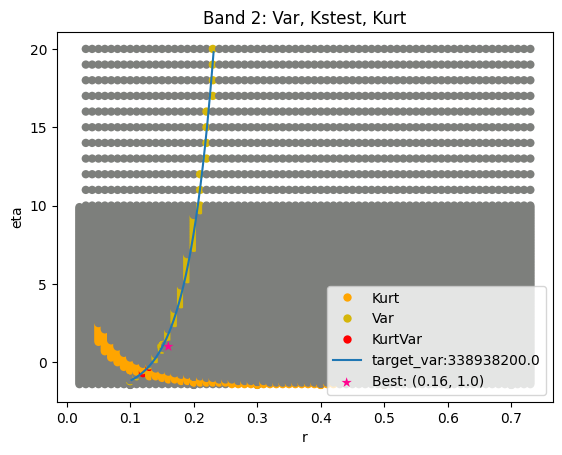

####
Band  5


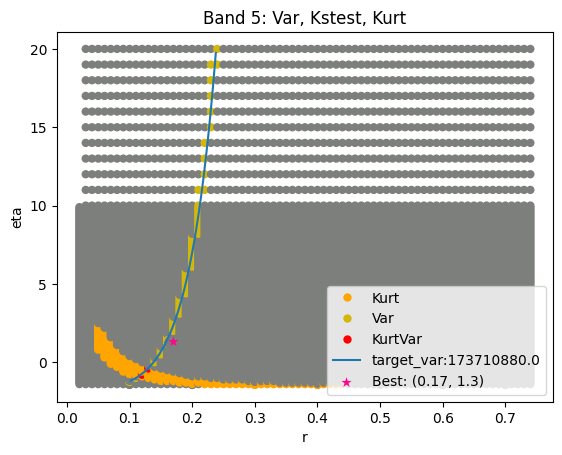

####
Band  8


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


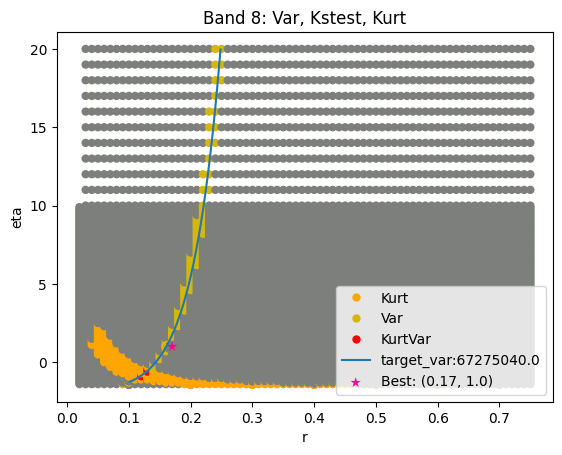

####
Band  11


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


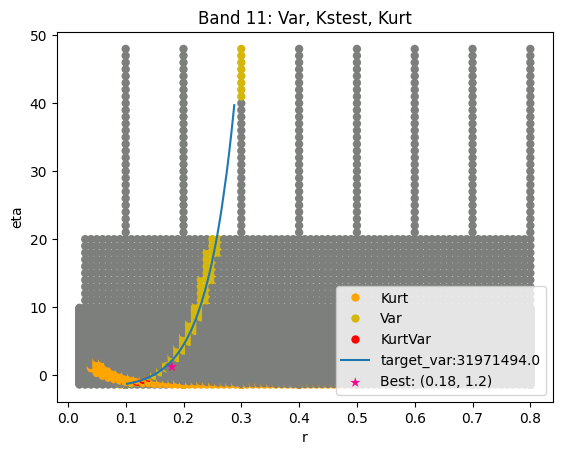

####
Band  14


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


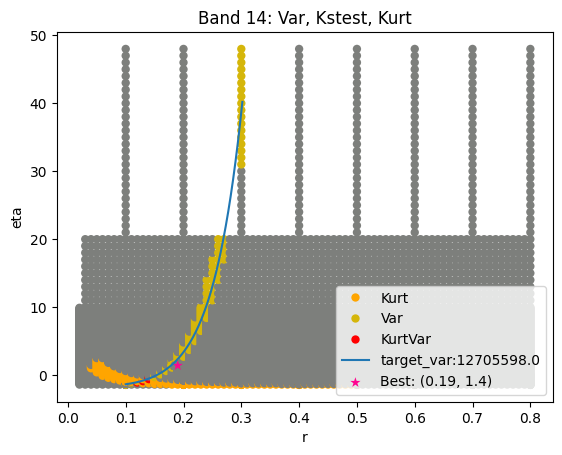

####
Band  17


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


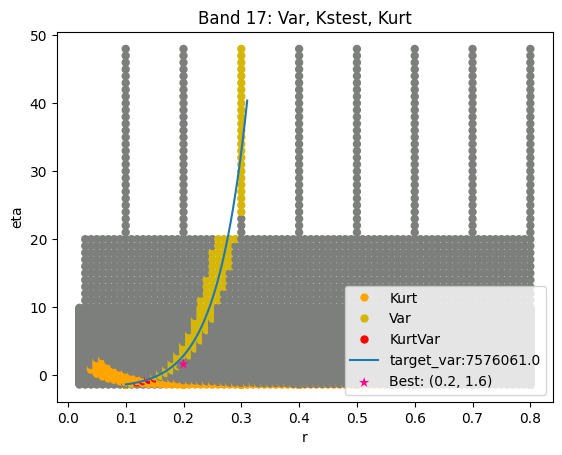

####
Band  20


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


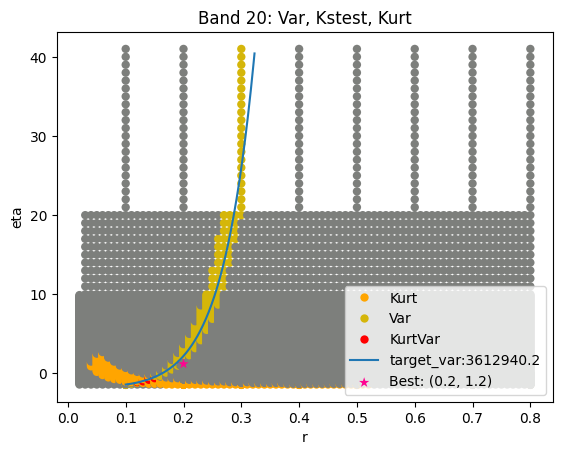

####
Band  23


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


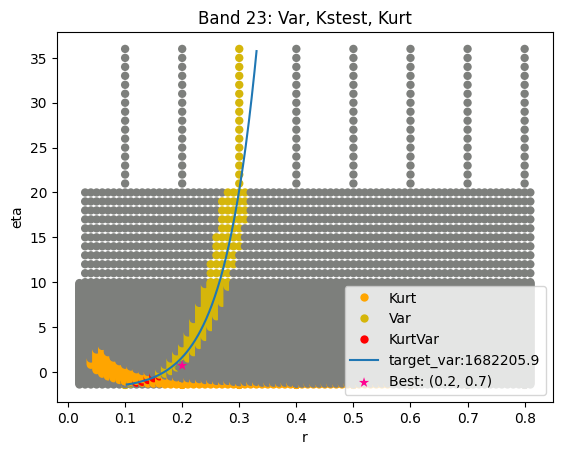

####
Band  26


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


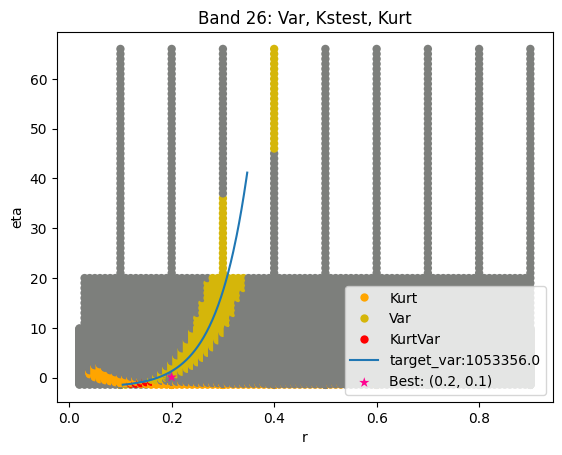

####
Band  29


/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


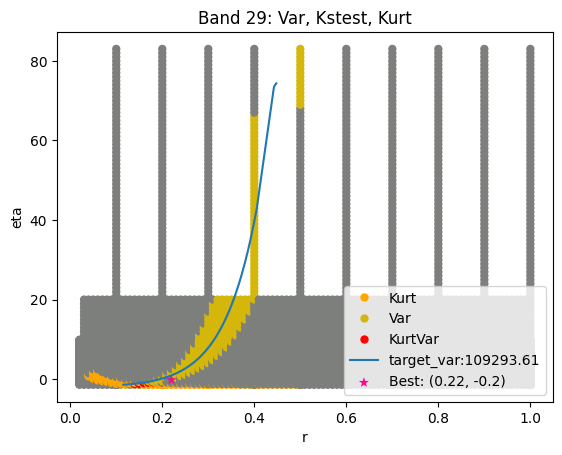

In [18]:
for i, group in enumerate(GROUPS):
    print(f"####\n{GROUP.capitalize()} ", group)
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']))
    fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

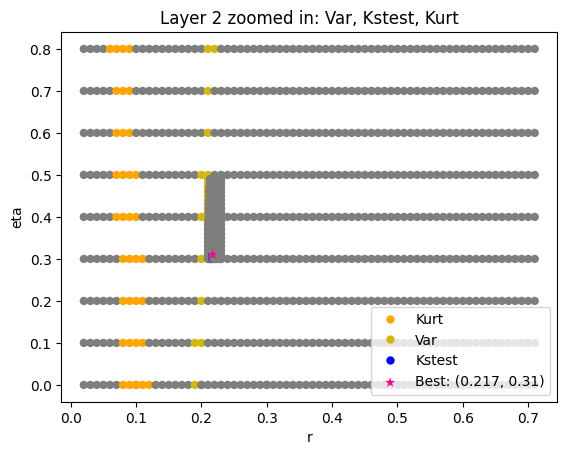

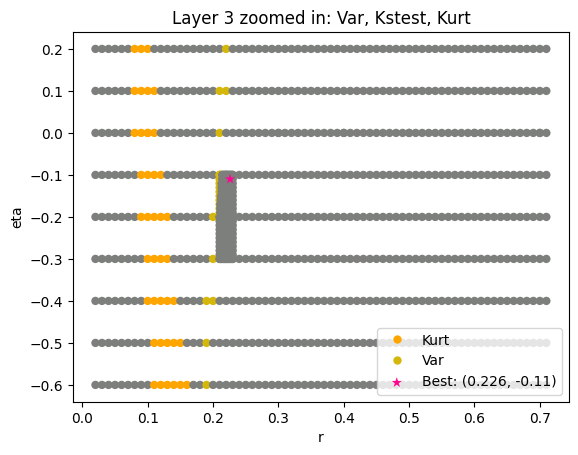

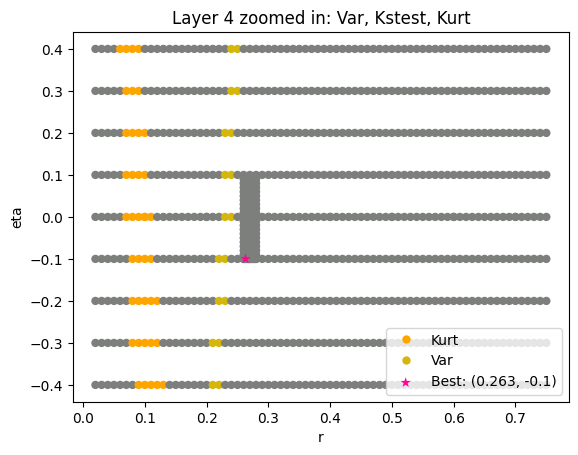

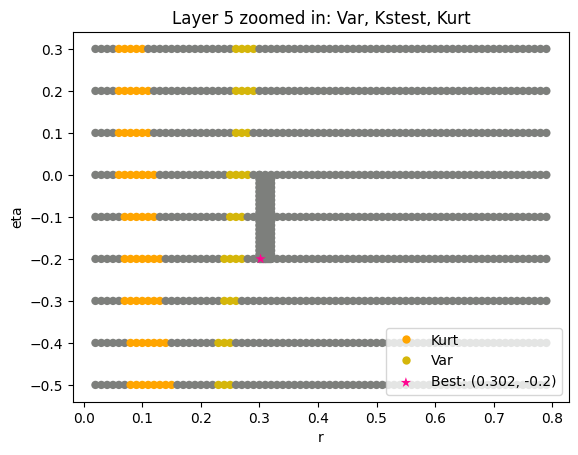

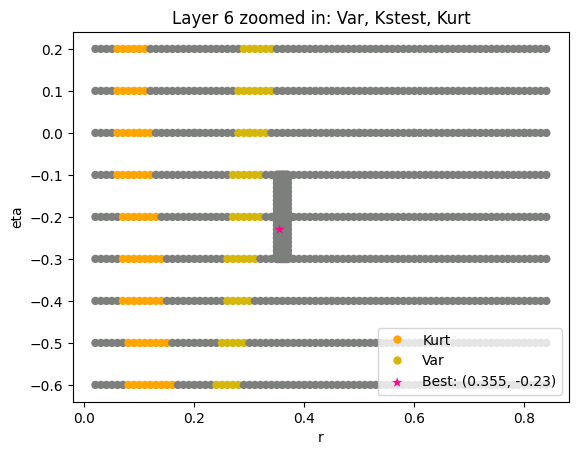

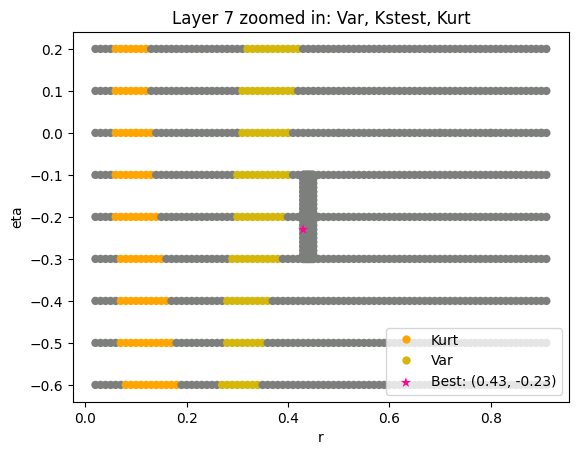

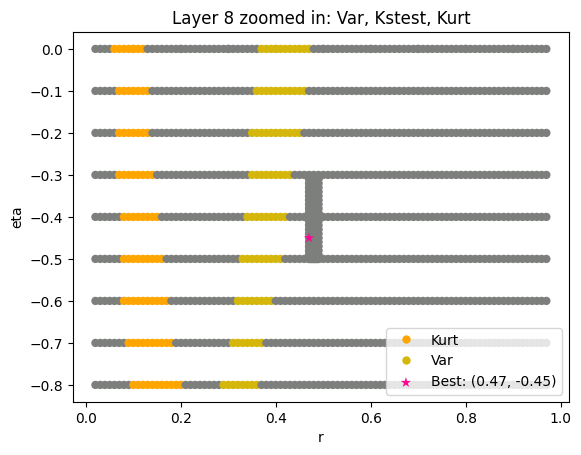

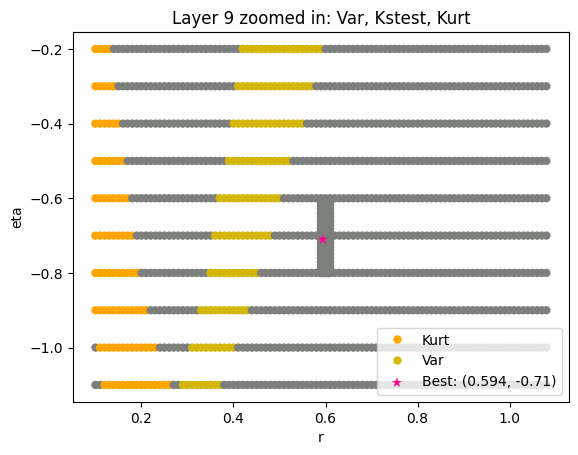

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


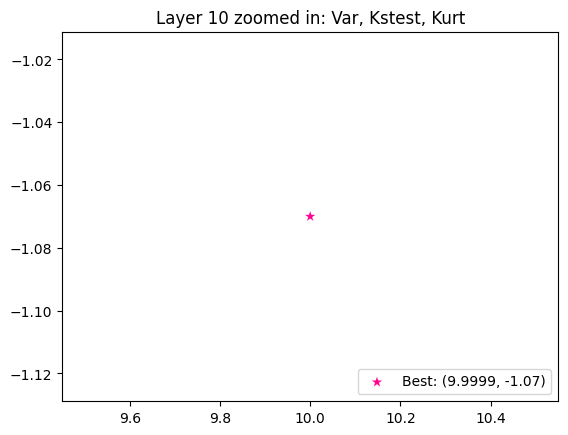

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,150199.610000,85008.824102,248364.732266,411.567795,85.166882,581.245881,9000.0,0.22,0.4,0.017328,...,126.386000,0.053287,1.188320e-22,112.080000,0.027644,2.081510e-06,88.349400,0.024432,4.239170e-05,6.077500e-02
3,33515.562000,19958.825879,52689.479258,366.283332,101.325688,561.984535,36000.0,0.22,-0.2,0.015524,...,51.097400,0.057075,2.235480e-102,45.218000,0.030592,1.054640e-29,35.563000,0.028171,2.979370e-25,2.954800e-06
4,8690.716000,4650.655151,15441.937554,584.811266,124.448718,1337.453648,144000.0,0.27,0.0,0.014394,...,21.927100,0.052141,0.000000e+00,19.615600,0.027260,2.143050e-93,15.331800,0.022689,7.963070e-65,1.200500e-20
5,1600.961900,772.053137,3722.834314,1309.721219,95.400870,3193.442929,576000.0,0.31,-0.1,0.012362,...,10.281000,0.046289,0.000000e+00,9.169130,0.022133,1.499790e-245,7.236210,0.015874,1.665910e-126,7.520700e-56
6,339.519200,152.123086,1059.839684,2687.210297,93.111475,4763.505439,2304000.0,0.36,-0.2,0.007668,...,5.464020,0.038784,0.000000e+00,4.855720,0.015043,0.000000e+00,3.837820,0.009457,2.077520e-179,3.834000e-97
7,87.086320,35.836773,371.805410,4823.475991,72.400958,6356.322824,9216000.0,0.44,-0.2,0.006620,...,3.123040,0.035890,0.000000e+00,2.768430,0.011098,0.000000e+00,2.214910,0.009042,0.000000e+00,7.390800e-234
8,29.883560,15.550574,79.512060,1685.915861,80.564132,3720.926795,36864000.0,0.48,-0.4,0.006882,...,2.034520,0.040489,0.000000e+00,1.797250,0.014289,0.000000e+00,1.433200,0.012347,0.000000e+00,0.000000e+00
9,8.940126,4.773328,23.294833,1591.253639,83.608903,3578.031731,147456000.0,0.60,-0.7,0.008517,...,1.019810,0.043489,0.000000e+00,0.905438,0.018283,0.000000e+00,0.715500,0.014077,0.000000e+00,0.000000e+00
10,1.353995,0.687269,4.314199,2561.703720,78.230434,4657.250795,589824000.0,10.00,-1.1,0.029303,...,0.370727,0.044892,0.000000e+00,0.329689,0.020144,0.000000e+00,0.259616,0.015220,0.000000e+00,0.000000e+00


In [6]:
for group in GROUPS: 
    temp_df = group_cdf_df_dict[group]
    eps = 0.5
    filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                    (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                    (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                    (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
    
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_test_plot(filtered_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                            best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
    fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

master_df

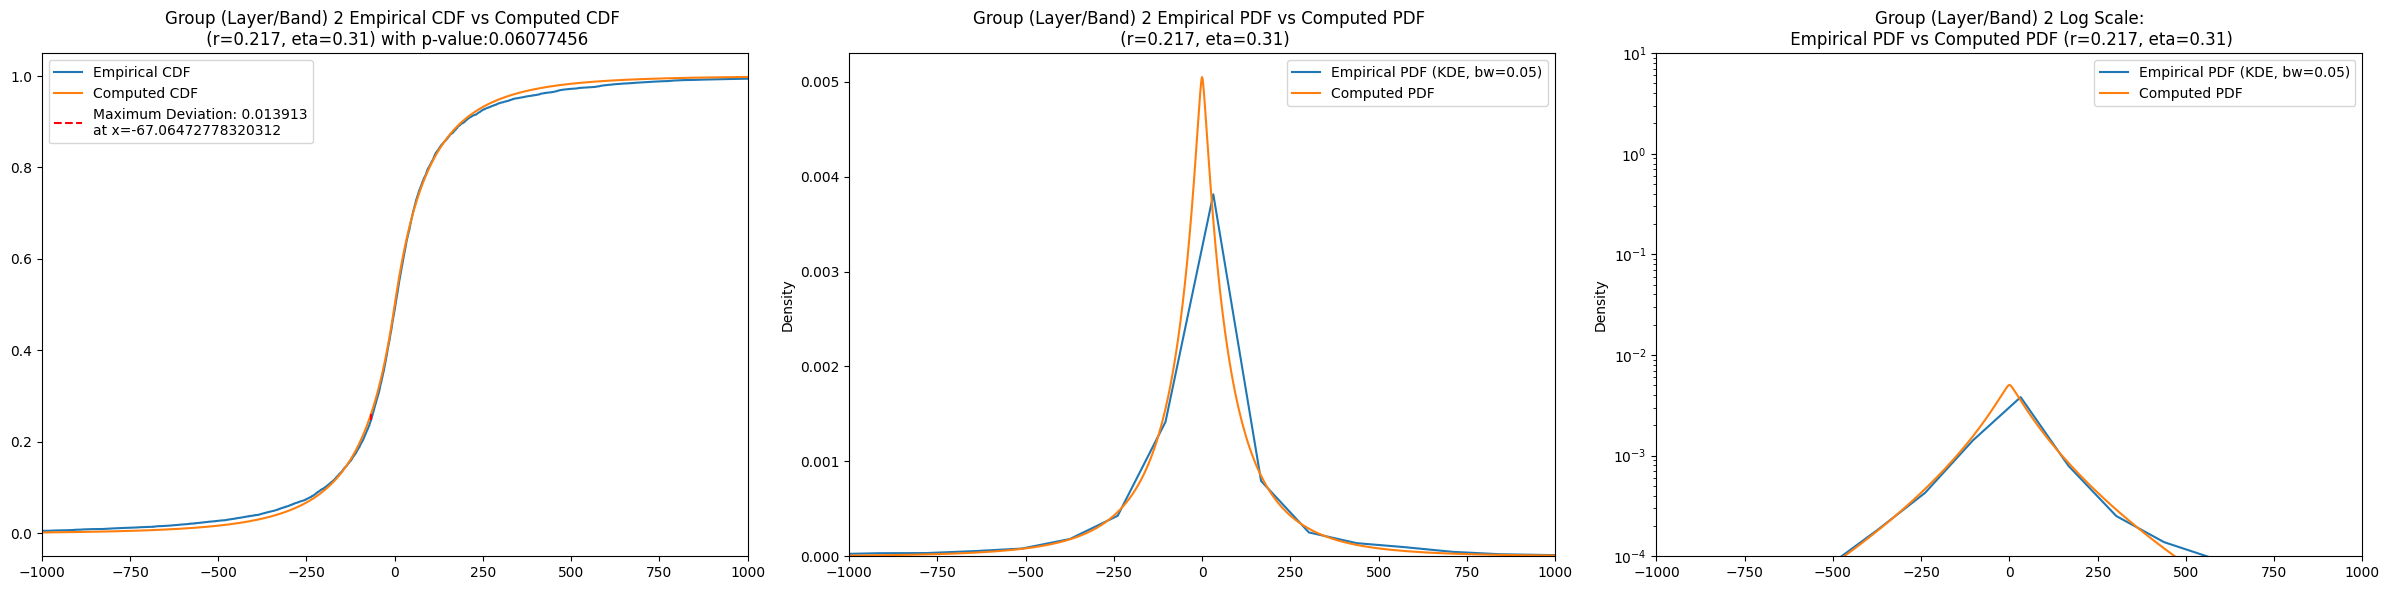

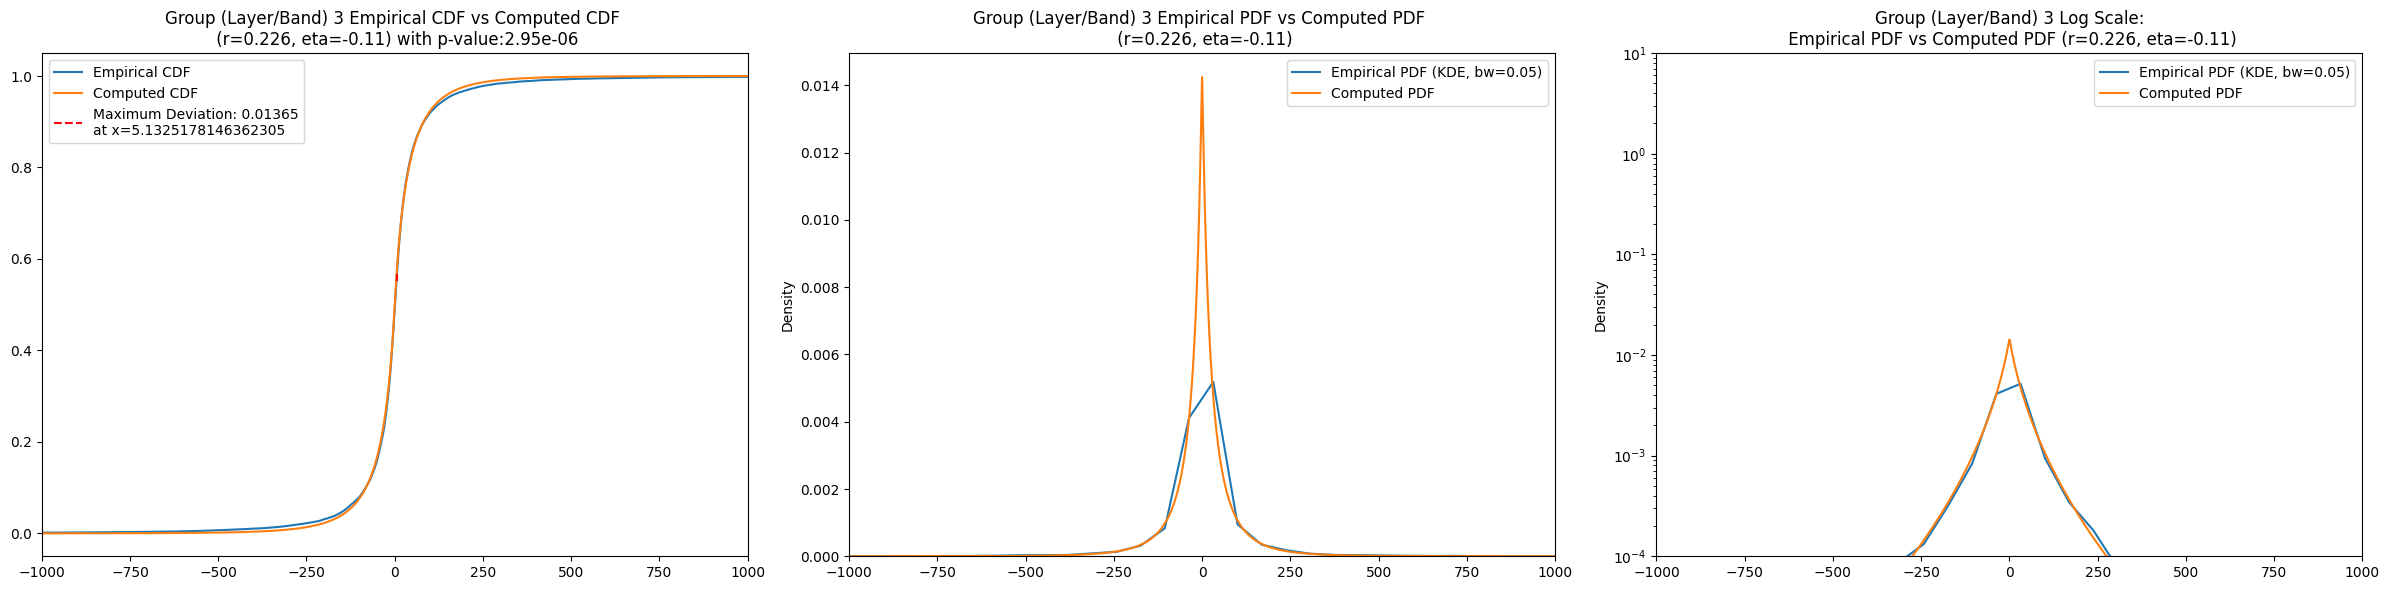

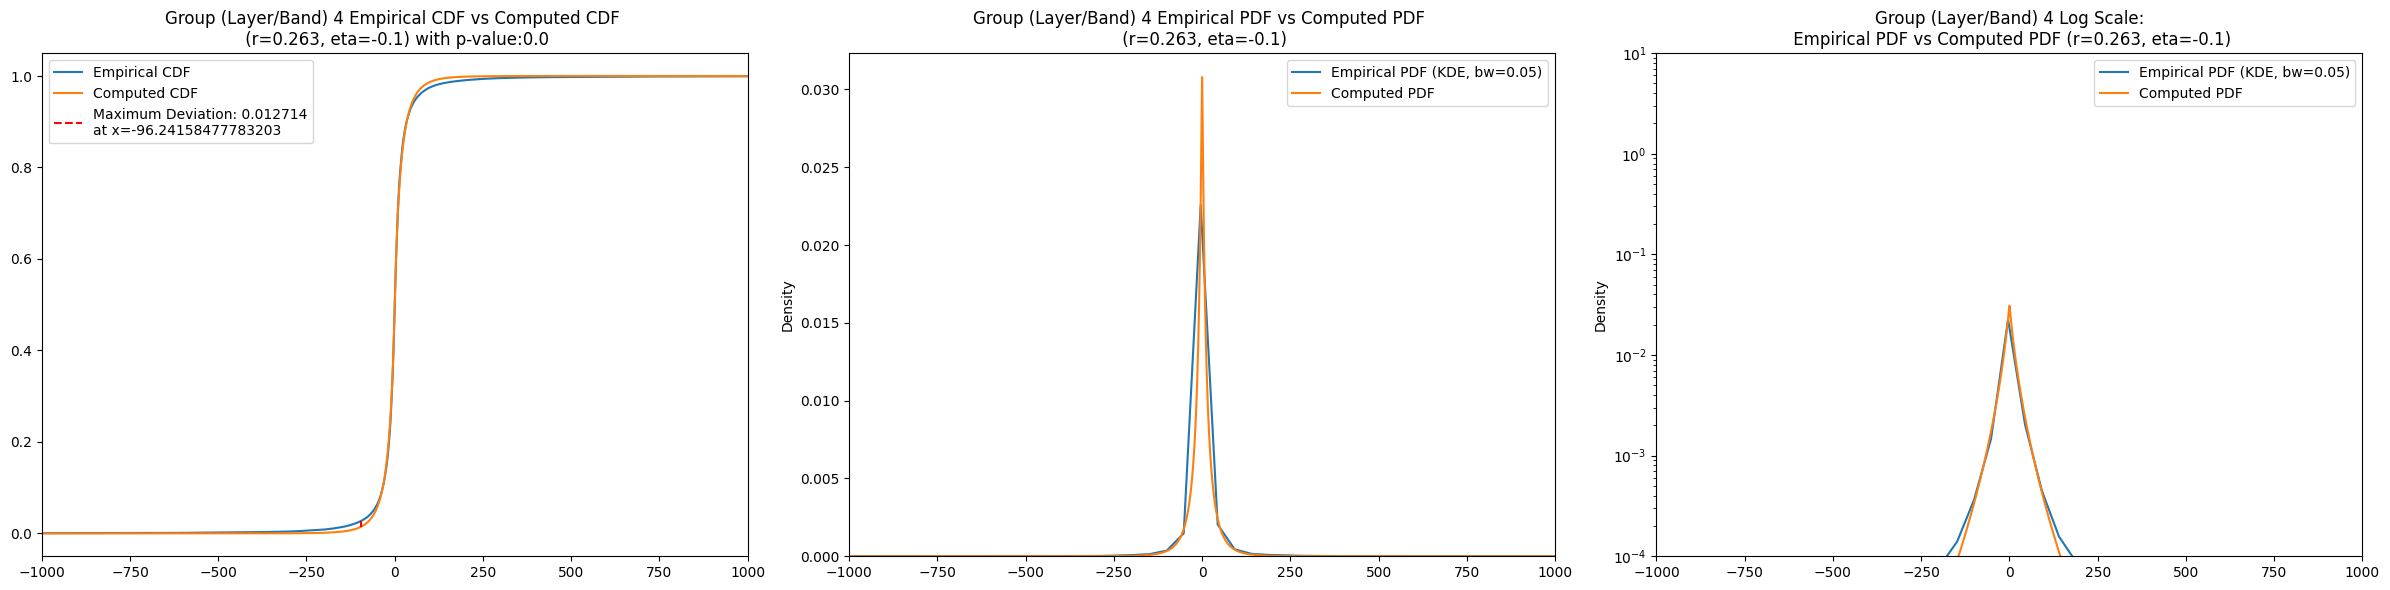

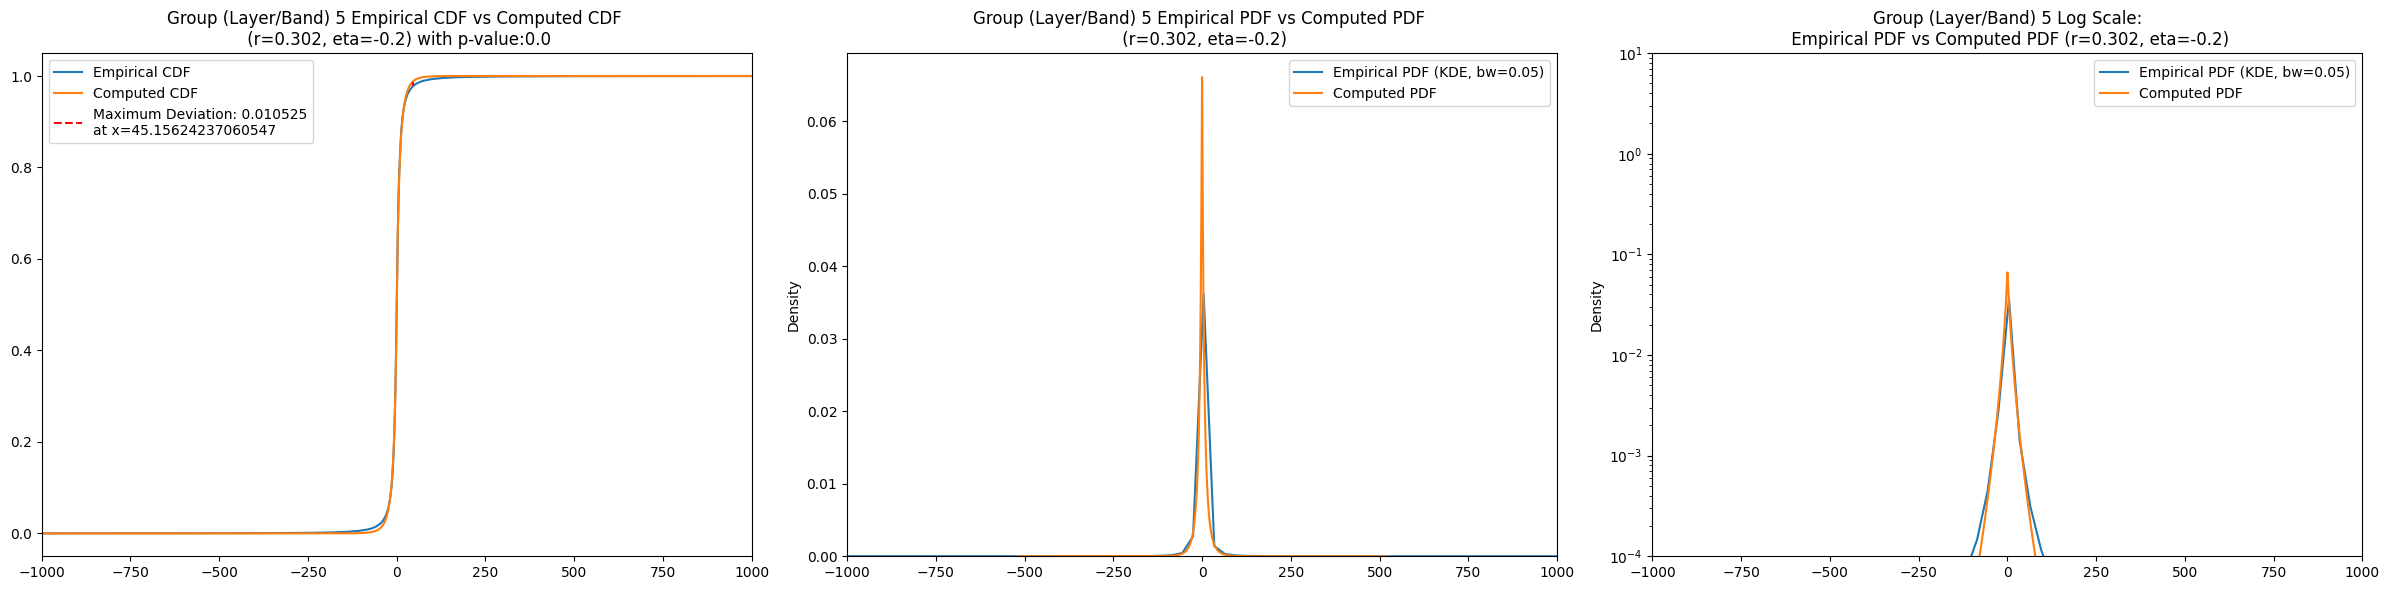

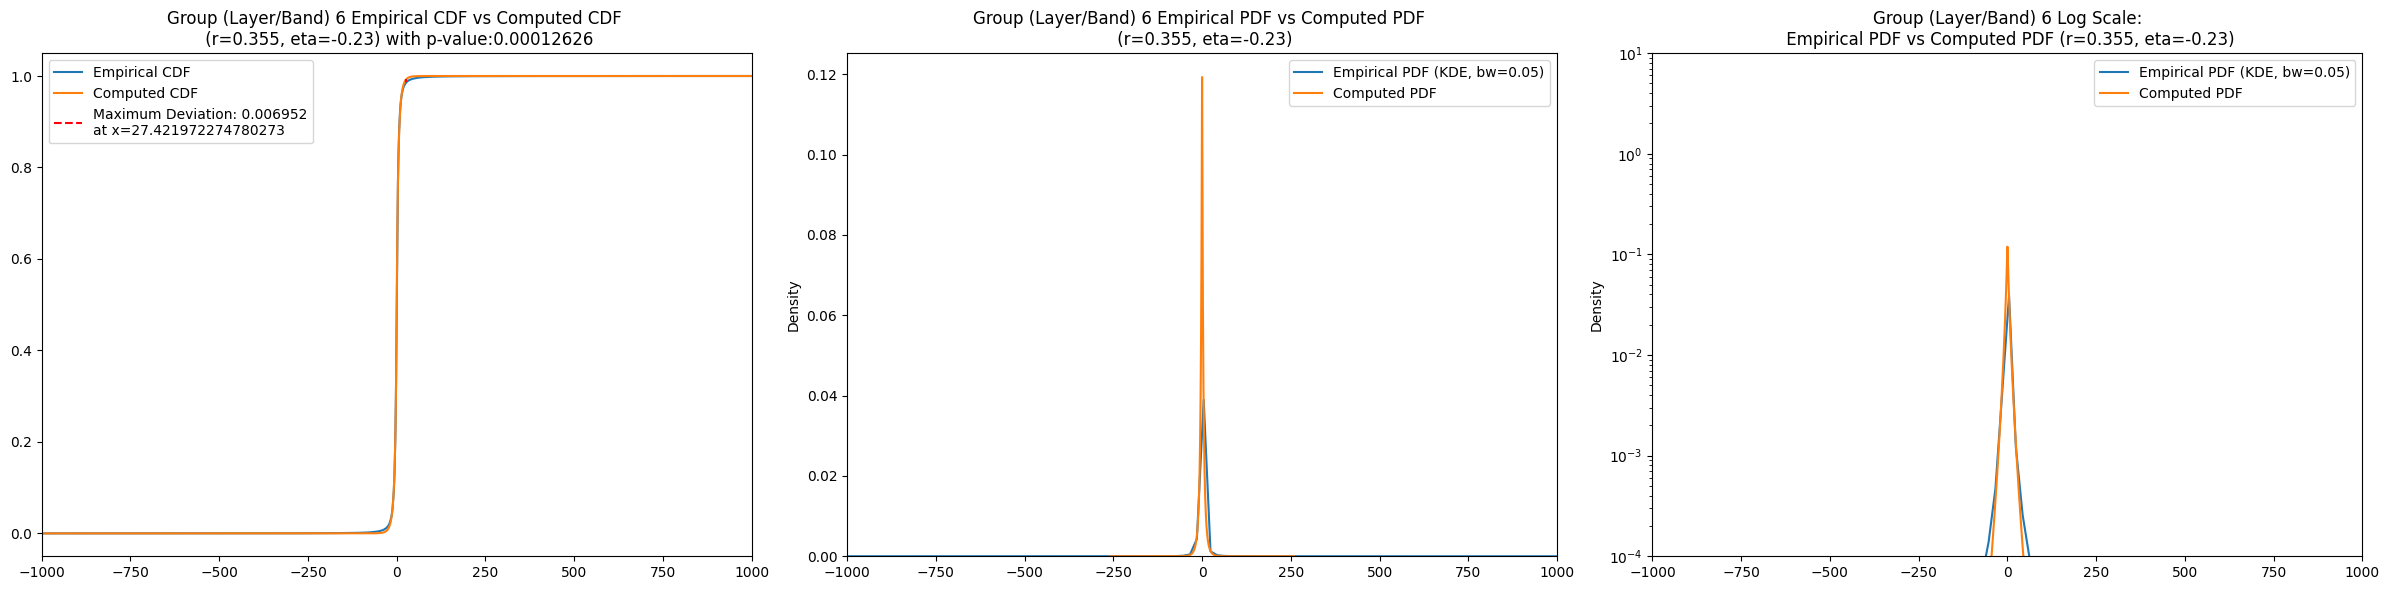

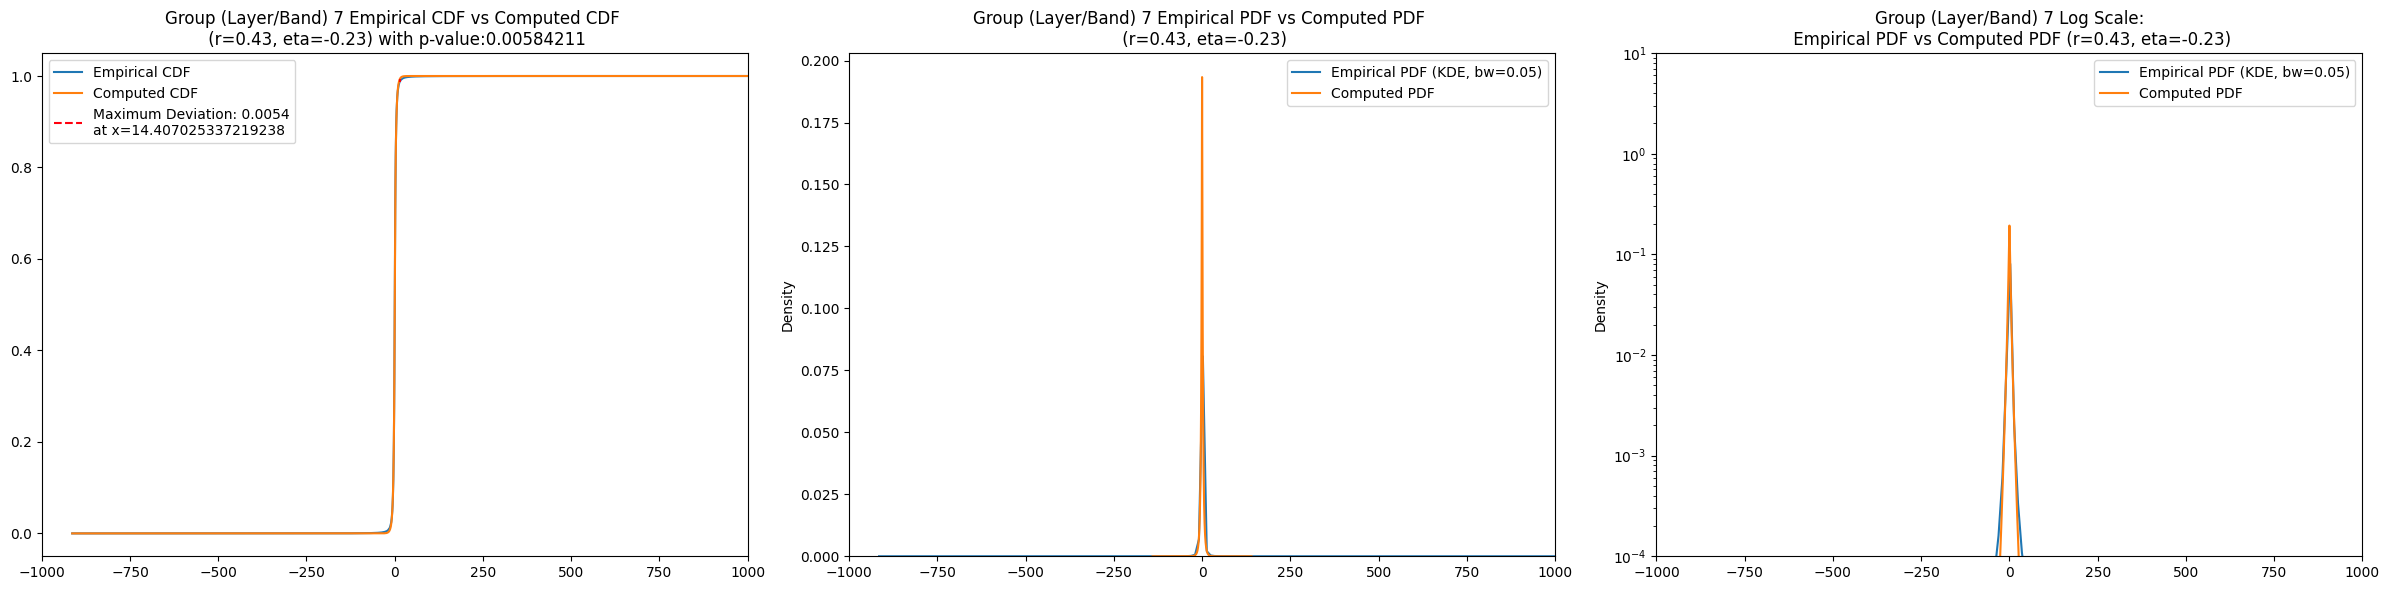

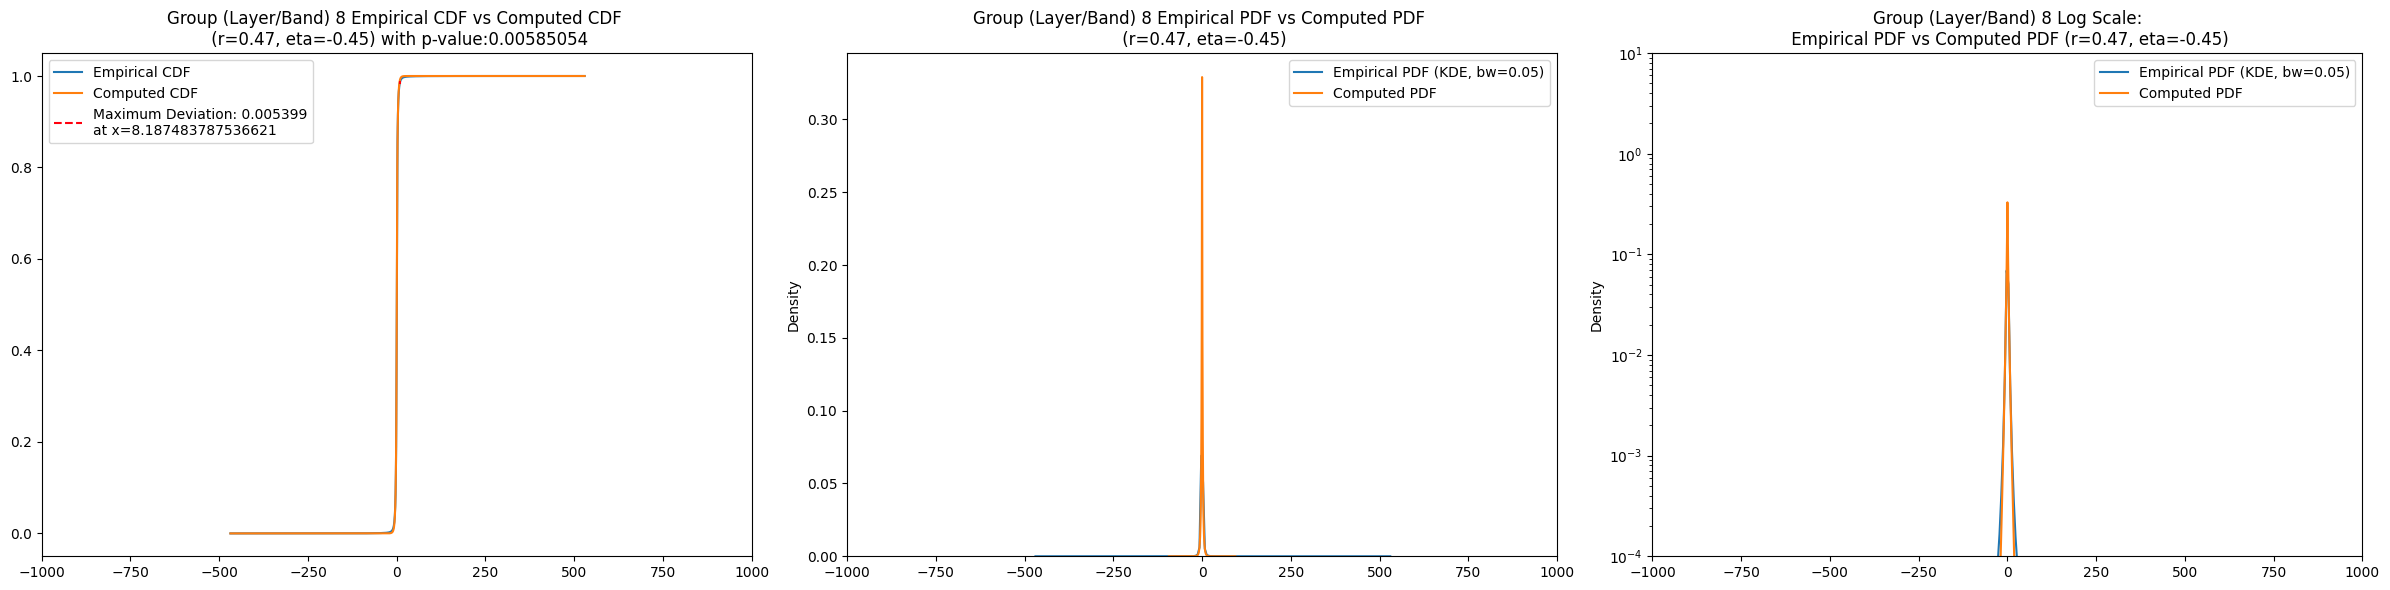

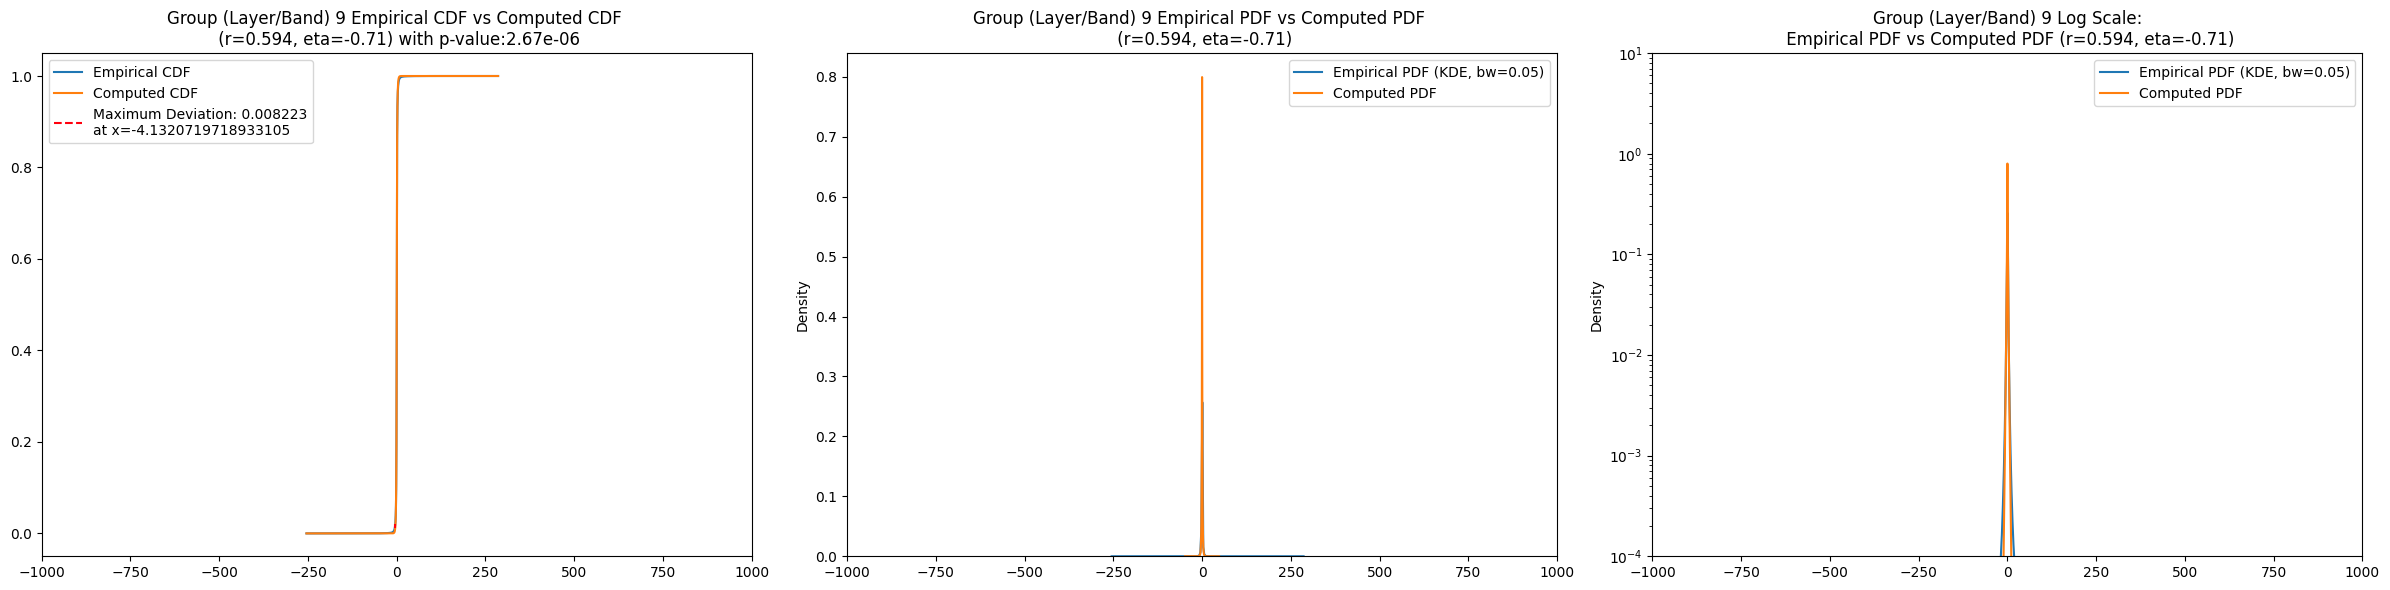

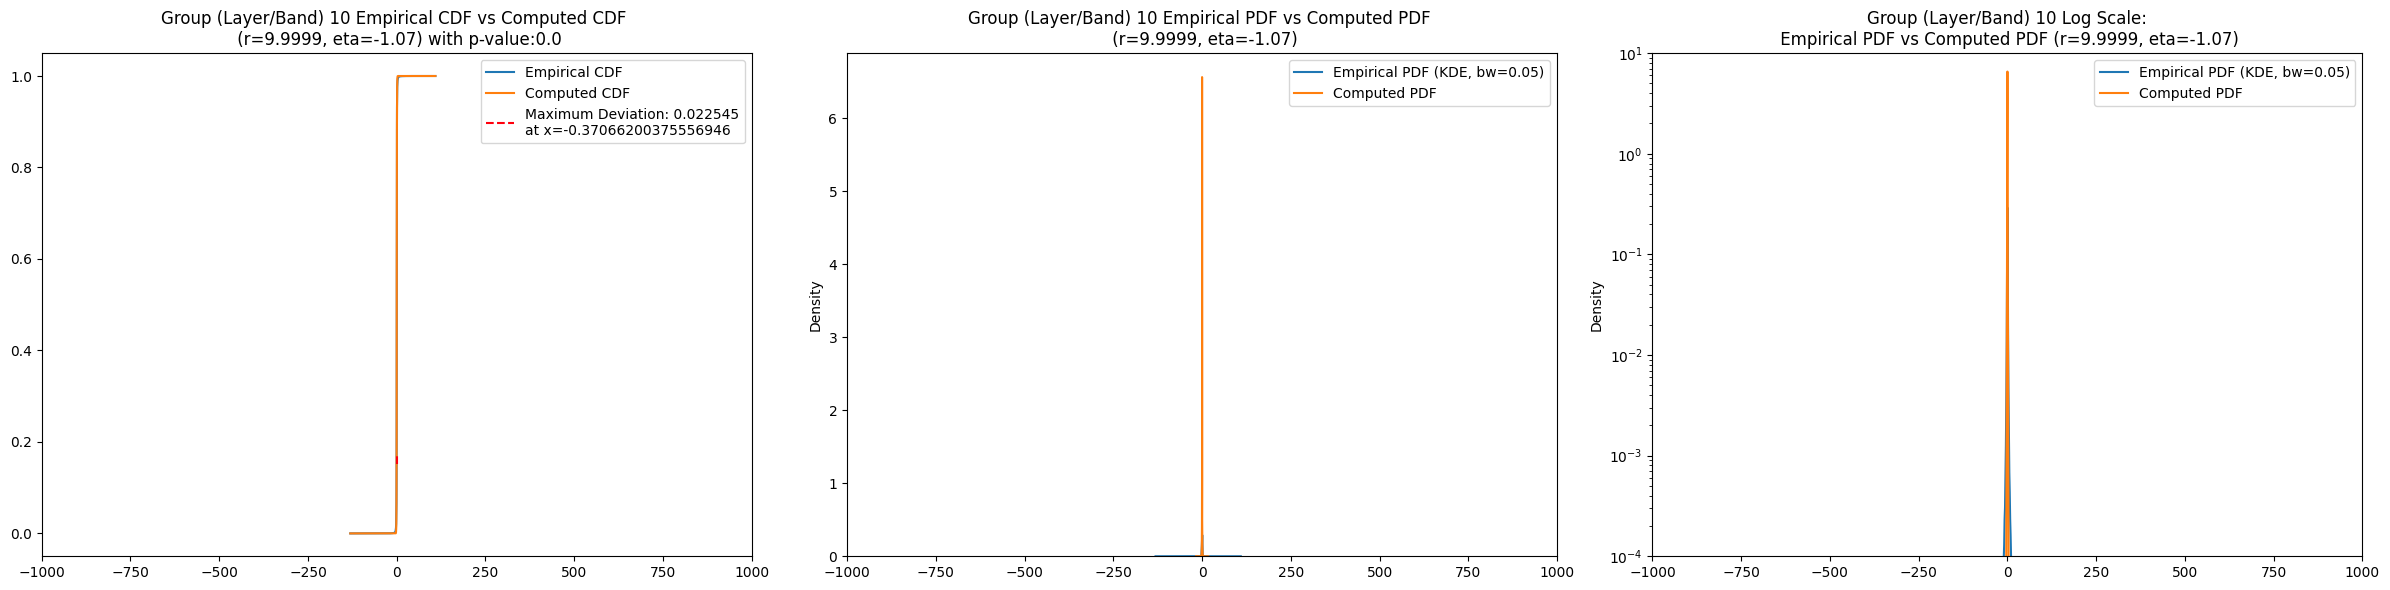

In [ ]:
for group in GROUPS:
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (master_df.loc[group]['best_r'], master_df.loc[group]['best_eta']), 
                    log_scale = True,
                    group = group,
                    interval = (-1000, 1000))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)